## Importing Libraries and Datasets

In [1]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading ingredients and ratings csv files
ingredients = pd.read_csv('../data/ingredients.csv')
ratings = pd.read_csv('../data/ratings.csv')

**Columns and Data Types:**

**Food_ID:** A numeric (int64) unique identifier for each food item. Numerical and unique, this is utilized as an indexing or unique identifier for the records.

**Name:** A string (object) that holds the name of the food. This is text data.

**C_Type (Cuisine Type):** A string object that categorizes all foods into different cuisine types. It is a categorical variable and is of utmost significance to our recommender system.

**Veg_Non (Vegetarian/Non-Vegetarian Status):** A string (object) that indicates the food as vegetarian or non-vegetarian. Another category variable that is crucial for filtering and recommendations based on diet.

**Describe (Ingredients List):** A string (object) consists of ingredients list of the food product. This text data is the most important information in the dataset that helps in recommending the food name based on availability of ingredients or identifying the missing ingredients that user might need to make a food item.

In [3]:
ingredients

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."
...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count..."
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl..."
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli..."
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu..."


In [4]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [5]:
ingredients.describe(include='object')

,Name,C_Type,Veg_Non,Describe
count,400,400,400,400
unique,400,16,2,397
top,Rosemary Roasted Vegetables,Indian,veg,"red lentils or masoor dal (half-boiled), potat..."
freq,1,88,238,2


In [6]:
ingredients['C_Type'].value_counts()

C_Type
Indian          88
Healthy Food    58
Dessert         53
Chinese         27
Italian         25
Snack           23
Thai            23
French          22
Mexican         21
Japanese        18
Beverage        11
Nepalese        11
Korean           9
Vietnames        9
 Korean          1
Spanish          1
Name: count, dtype: int64

In [7]:
ingredients['Veg_Non'].value_counts()

Veg_Non
veg        238
non-veg    162
Name: count, dtype: int64

## Data Pre-processing

In [8]:
# Removing the white spaces in the cuisine type column
ingredients['C_Type'] = ingredients['C_Type'].apply(lambda x:x.strip())
# Seperating all the ingredients with a comma, removing white spaces around the ingredient name
ingredients['Describe Cleaned'] = ingredients['Describe'].apply(lambda x:[item.strip().lower() for item in x.split(',')])
# Counting the # of ingredients required for each meal
ingredients['ingredients_count'] = ingredients['Describe Cleaned'].apply(lambda x:len(x))

In [9]:
# dataset after applying the above pre-processing steps
ingredients

,Food_ID,Name,C_Type,Veg_Non,Describe,Describe Cleaned,ingredients_count
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin...","[white balsamic vinegar, lemon juice, lemon ri...",10
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...","[olive oil, chicken mince, garlic (minced), on...",16
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ...","[almonds whole, egg white, curry leaves, salt,...",6
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ...","[vinegar, honey/sugar, soy sauce, salt, garlic...",11
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest...","[christmas dry fruits (pre-soaked), orange zes...",8
...,...,...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count...","[cream cheese, chopped kimchi, scallions, coun...",6
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl...","[poblano chiles, bacon, shrips, red salsa, gar...",7
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli...","[broccoli, bread crumbs, anchovy fillets, garl...",7
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu...","[egg yolks, lemon juice, unsalted butter, all ...",7


In the above pre-processing, we have included the following steps:
1. **Removing the white spaces** in the cuisine type to avoid the redundant cuisine types like in Korean
2. **Seperated the Describe column** to create the list of ingredients to make sure each element of ingredients list can be further analyzed
3. Used the Describe Cleaned column to **count the number of Ingredients** in each of the item

After performing the list of pre-processing steps, there are new features included in the pre-processed data
1. **'Describe Cleaned'** column has list of ingredients without any whitespaces whereas 'Describe' was a single string
2. **'ingredients_count'** column has the count of ingredients used to prepare a food item

Above steps made it easier to make the following analysis/visualizations:
1. **Mean and Standard Deviations of Ingredients** with respect to Veg/ Non-Veg and differet cuisine types.
2. **Word clouds** of Ingredients with respect to Veg/ Non-Veg and differet cuisine types.
3. **Most common ingredients** used with respect to Veg/ Non-Veg and differet cuisine types.
4. **Correlation analysis** between multiple ingredients

## Bar plots

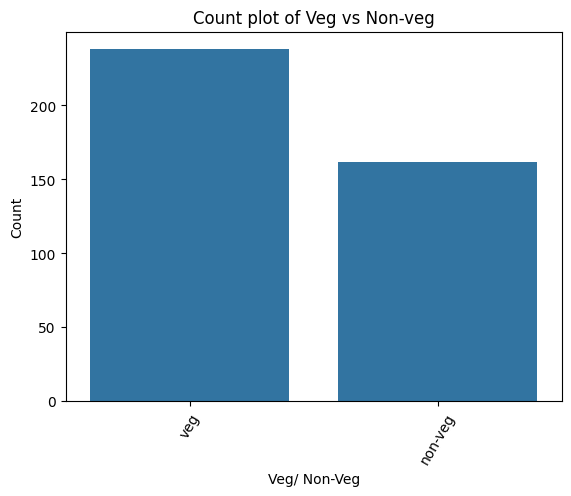

In [10]:
# Plotting counts of Veg vs Non-veg
sns.countplot(data = ingredients, x = 'Veg_Non', order=ingredients['Veg_Non'].value_counts(ascending=False).index)
plt.xlabel('Veg/ Non-Veg')
plt.ylabel('Count')
plt.title('Count plot of Veg vs Non-veg')
plt.xticks(rotation=60)
plt.show()

The bar graph, **Vegetarian vs. Non-Vegetarian Dishes,** indicates the distribution of diet preference in our dataset of dishes, with more vegetarian dishes than non-vegetarian dishes. This imbalance can affect the performance of our cuisine recommender system, perhaps suggesting more vegetarian dishes. To mitigate this and enhance the system's recommendation of both types of diets equally, measures such as filtering data based on user preferences, having more weightage for important features should be implemented. Understanding this distribution is vital in developing a more diverse recommender system that can best reflect the diverse food alternatives of all the customers.

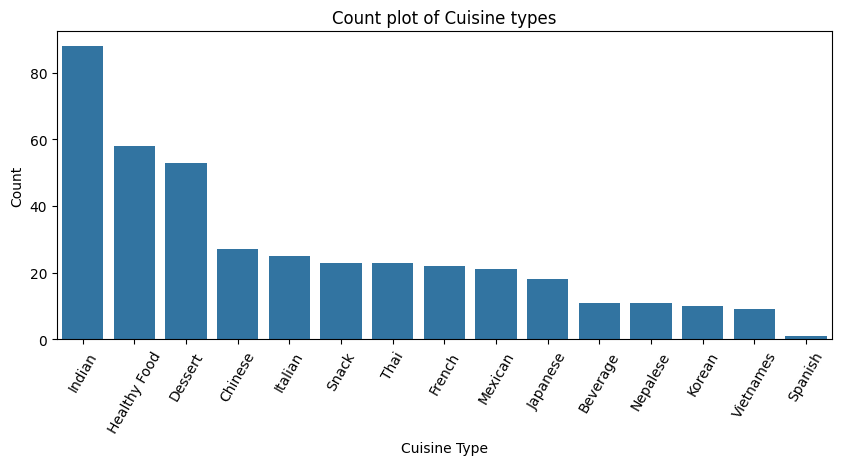

In [11]:
# Plotting counts of Cuisine types
plt.figure(figsize=(10,4))
sns.countplot(data = ingredients, x = 'C_Type', order=ingredients['C_Type'].value_counts(ascending=False).index)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Count plot of Cuisine types')
plt.xticks(rotation=60)
plt.show()

The **Distribution of Cuisine Types** chart shows the number of occurrences of each cuisine in the data set, with "Indian" being the most common, followed by "Healthy Food" and "Dessert." This is a bias towards some cuisines, mainly Indian, and it can influence the performance of the recommender system. This form of dataset skew would produce more accurate and diverse Indian food recommendations at the cost of possibly doing an injustice to underrepresented cuisine like Spanish or Korean. Skew can be better handled by prioritizing the user preferences over available ingredients to ensure recommendations are more personalized.

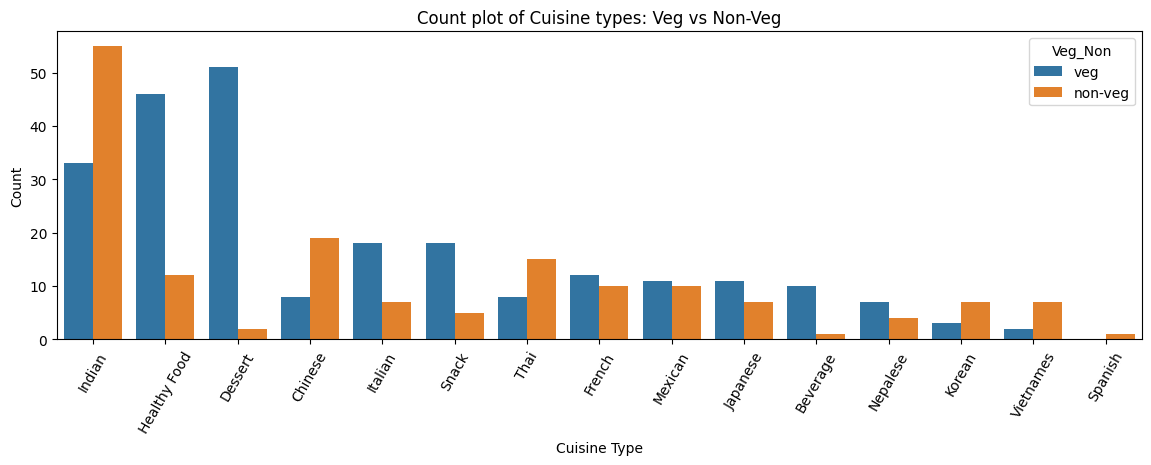

In [12]:
# Plotting counts of Cuisine & Dietary Preference types 
plt.figure(figsize=(14,4))
sns.countplot(data=ingredients, x='C_Type', hue='Veg_Non',
                   order=ingredients['C_Type'].value_counts(ascending=False).index)

plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Count plot of Cuisine types: Veg vs Non-Veg')
plt.xticks(rotation=60)
plt.show()

The bar graph, "Cuisine Type by Vegetarian and Non-Vegetarian," shows the hierarchy of the food type of the various categories of cuisines in our data. Indian takes the lead by a humongous proportion of non-vegetarian, characterizing its type and popularity with non-vegetarian diets and Healthy food and Dessert being the top vegetarian foods based on the data. This plot emphasizes the importance of each feature/ user preferences as there are imbalances at multiple levels showing the necessity of robust recommender system for this data.

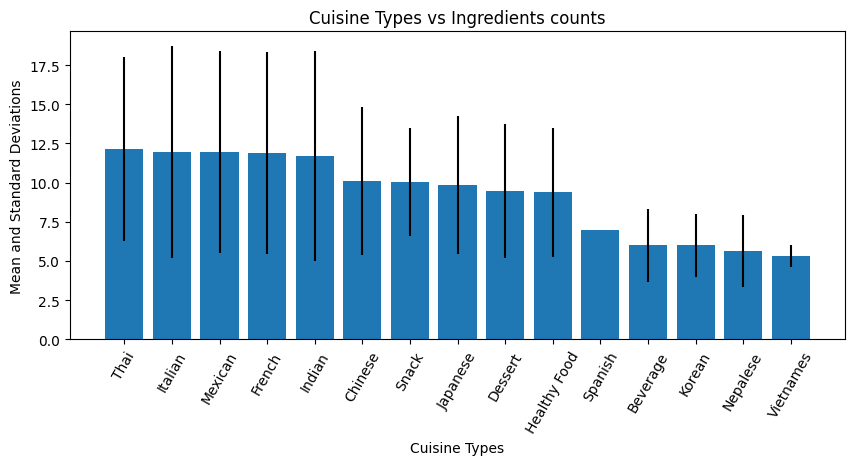

In [13]:
# Plotting mean, standard deviation of Cuisine types 

# Group by 'C_Type' and calculate the mean and std for 'ingredients_count'
plt.figure(figsize=(10,4))
grouped = ingredients.groupby('C_Type')['ingredients_count']
means = grouped.mean().sort_values(ascending=False)
stds = grouped.std().loc[means.index]

# Create the bar plot
plt.bar(means.index, means.values, yerr=stds.values)
plt.xticks(rotation=60)
plt.xlabel('Cuisine Types')
plt.ylabel('Mean and Standard Deviations')
plt.title('Cuisine Types vs Ingredients counts')
plt.show()

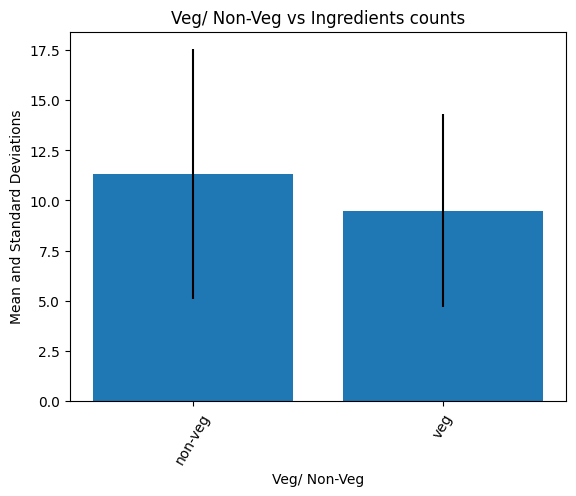

In [14]:
# Plotting mean, standard deviation of Dietary Preference types 

# Group by 'Veg_Non' and calculate the mean and std for 'ingredients_count'
grouped = ingredients.groupby('Veg_Non')['ingredients_count']
means = grouped.mean().sort_values(ascending=False)
stds = grouped.std().loc[means.index]

# Create the bar plot
plt.bar(means.index, means.values, yerr=stds.values)
plt.xticks(rotation=60)
plt.xlabel('Veg/ Non-Veg')
plt.ylabel('Mean and Standard Deviations')
plt.title('Veg/ Non-Veg vs Ingredients counts')
plt.show()

In the **Cuisine types plot**, Thai cuisine shows the highest average number of ingredients, but also exhibits a relatively large variation (standard deviation), indicating diverse ingredient usage across Thai recipes. In contrast, cuisines like Nepalese and Vietnamese appear to have lower average ingredient counts with less variability, suggesting more consistent ingredient usage. In **Veg vs Non-Veg plot**, there is notable differences in the means of both type. Overall, the average ingredient counts across these cuisines range roughly from 7 to 12, reflecting a notable spread in how many ingredients different cuisines typically use. This plot highlights the variations in the ingredient counts which advatanges recommender systems to easily identify or categorize user preferred cuisine type based on number of ingredients.

In [15]:
ingredients

,Food_ID,Name,C_Type,Veg_Non,Describe,Describe Cleaned,ingredients_count
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin...","[white balsamic vinegar, lemon juice, lemon ri...",10
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...","[olive oil, chicken mince, garlic (minced), on...",16
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ...","[almonds whole, egg white, curry leaves, salt,...",6
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ...","[vinegar, honey/sugar, soy sauce, salt, garlic...",11
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest...","[christmas dry fruits (pre-soaked), orange zes...",8
...,...,...,...,...,...,...,...
395,396,Kimchi Toast,Korean,veg,"cream cheese, chopped kimchi, scallions,count...","[cream cheese, chopped kimchi, scallions, coun...",6
396,397,"Tacos de Gobernador (Shrimp, Poblano, and Chee...",Mexican,non-veg,"poblano chiles, bacon, shrips, red salsa, garl...","[poblano chiles, bacon, shrips, red salsa, gar...",7
397,398,Melted Broccoli Pasta With Capers and Anchovies,French,non-veg,"broccoli,Bread Crumbs, anchovy fillets, garli...","[broccoli, bread crumbs, anchovy fillets, garl...",7
398,399,Lemon-Ginger Cake with Pistachios,Dessert,non-veg,"egg yolks,lemon juice, unsalted butter, all pu...","[egg yolks, lemon juice, unsalted butter, all ...",7


In [16]:
all_ingredients = [each_ingredient for sublist in ingredients["Describe Cleaned"] for each_ingredient in sublist]
ingredient_counts = Counter(all_ingredients)
top_20_ingredient_counts = ingredient_counts.most_common(20)
top_20_ingredients, top_20_counts = zip(*top_20_ingredient_counts)

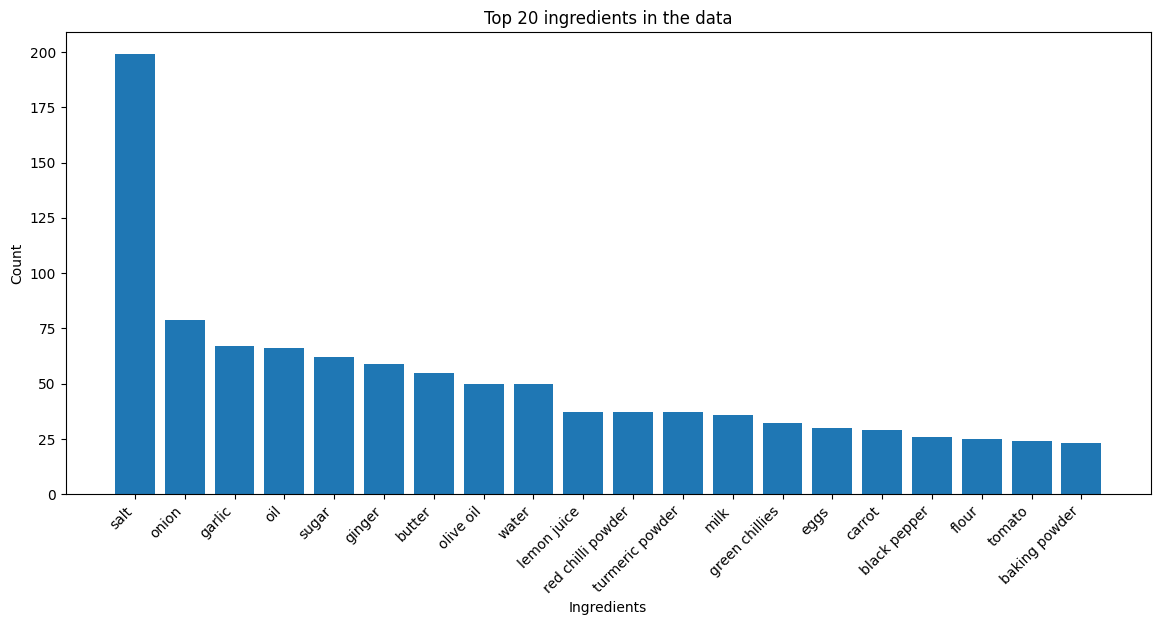

In [17]:
plt.figure(figsize=(14, 6)) 
plt.bar(top_20_ingredients, top_20_counts)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Ingredients")
plt.ylabel("Count")
plt.title('Top 20 ingredients in the data')
plt.show()

This analysis identifies the most commonly used ingredients in all the recipes, which is important for the construction of a cuisine recommendation system. The graph indicates that salt, onions, garlic and oil are some of the most frequently used ingredients, indicating that they are common ingredients in many recipes. It indicates that having many ingredients out of required ingredients is not enough if they are common among all the recipes. This plot made us to implment **Content based recommender systems using Tf-Idf vectorizer** which is robust to common items in the data. As we know most of the food items need oil which is a most common and recommending chicken curry by mentioning 1 item matched (Oil) would not help compared to recommending chicken curry when user has chicken in the available ingredients. So, it is important to understand the list of common ingredients and make recommender systems powerful by overcoming such problems with some techniques like Tf-Idf.

## Heatmap - Correlation on Ingredient co-occurences

In [18]:
# Exploded the dataframe based on  Describe Cleaned column to make unique row for each of the ingredient used in a food item
ingredients_df_exploded = ingredients.explode("Describe Cleaned")
# Calculated the value_counts of each ingredient in the entire dataframe
ingredient_counts = ingredients_df_exploded['Describe Cleaned'].value_counts()

In [19]:
# Picked top 20 ingredients and filtered the exploded dataframe
top_ingredients = ingredient_counts.nlargest(20).index
ingredients_df_exploded_filtered = ingredients_df_exploded[ingredients_df_exploded["Describe Cleaned"].isin(top_ingredients)]

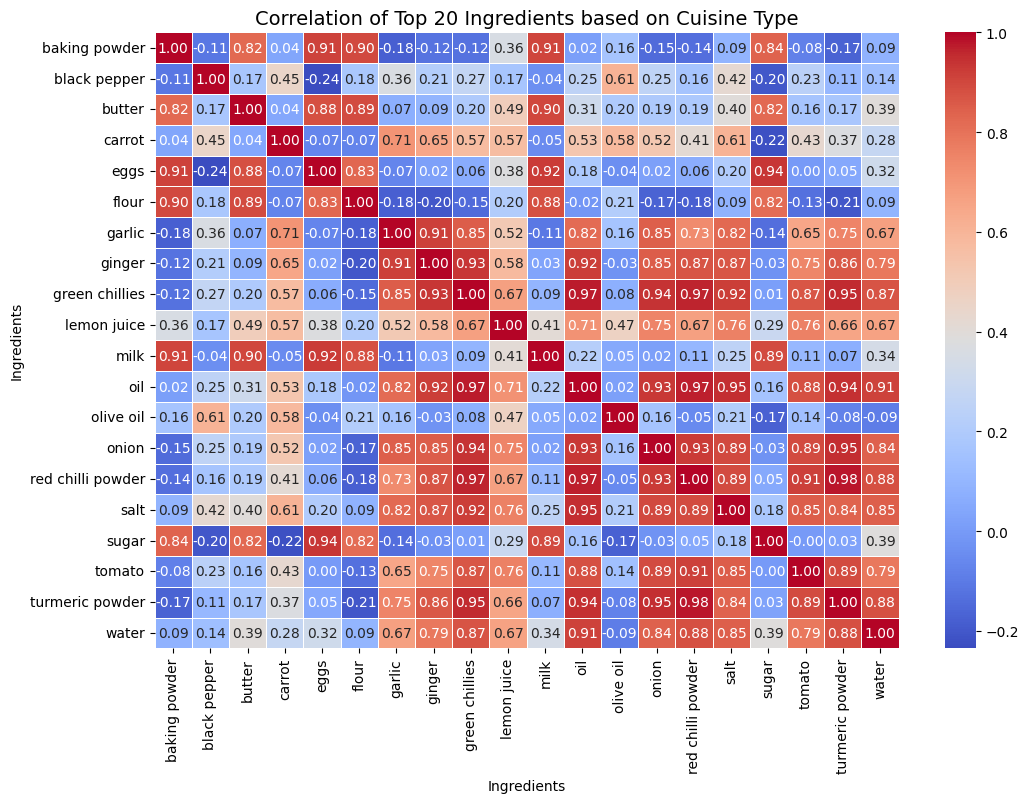

In [20]:
# Creating a pivot table: cuisine types as rows, ingredients as columns
# Resultant matrix has counts of each ingredient with respect to the cuisine type
cuisine_ingredient_matrix = pd.crosstab(ingredients_df_exploded_filtered["C_Type"], ingredients_df_exploded_filtered["Describe Cleaned"])

# Computing correlation matrix
correlation_matrix = cuisine_ingredient_matrix.corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title(f"Correlation of Top 20 Ingredients based on Cuisine Type", fontsize=14)
plt.xlabel("Ingredients")
plt.ylabel("Ingredients")
plt.show()

This **heatmap** tells us of how common ingredients relate to each other, which ones tend to frequently co-appear in different types of cuisines. These sorts of high correlation such as oil & green chillies, oil & red chilli powder, oil & salt and garlic & ginger are representative of common culinary combos, which play a pivotal role in association rule mining by identifying the other item and recommneding the second item as they can be used together. Negative or low correlations also determine ingredients that are not typically paired together, which can uncover distinctive flavor profiles between cuisines. This analysis on co-occurennces helped us in understanding the particular naunces among the ingredients and potential applications in rule mining.

## Wordclouds on Cuisine types & Dietary preferences

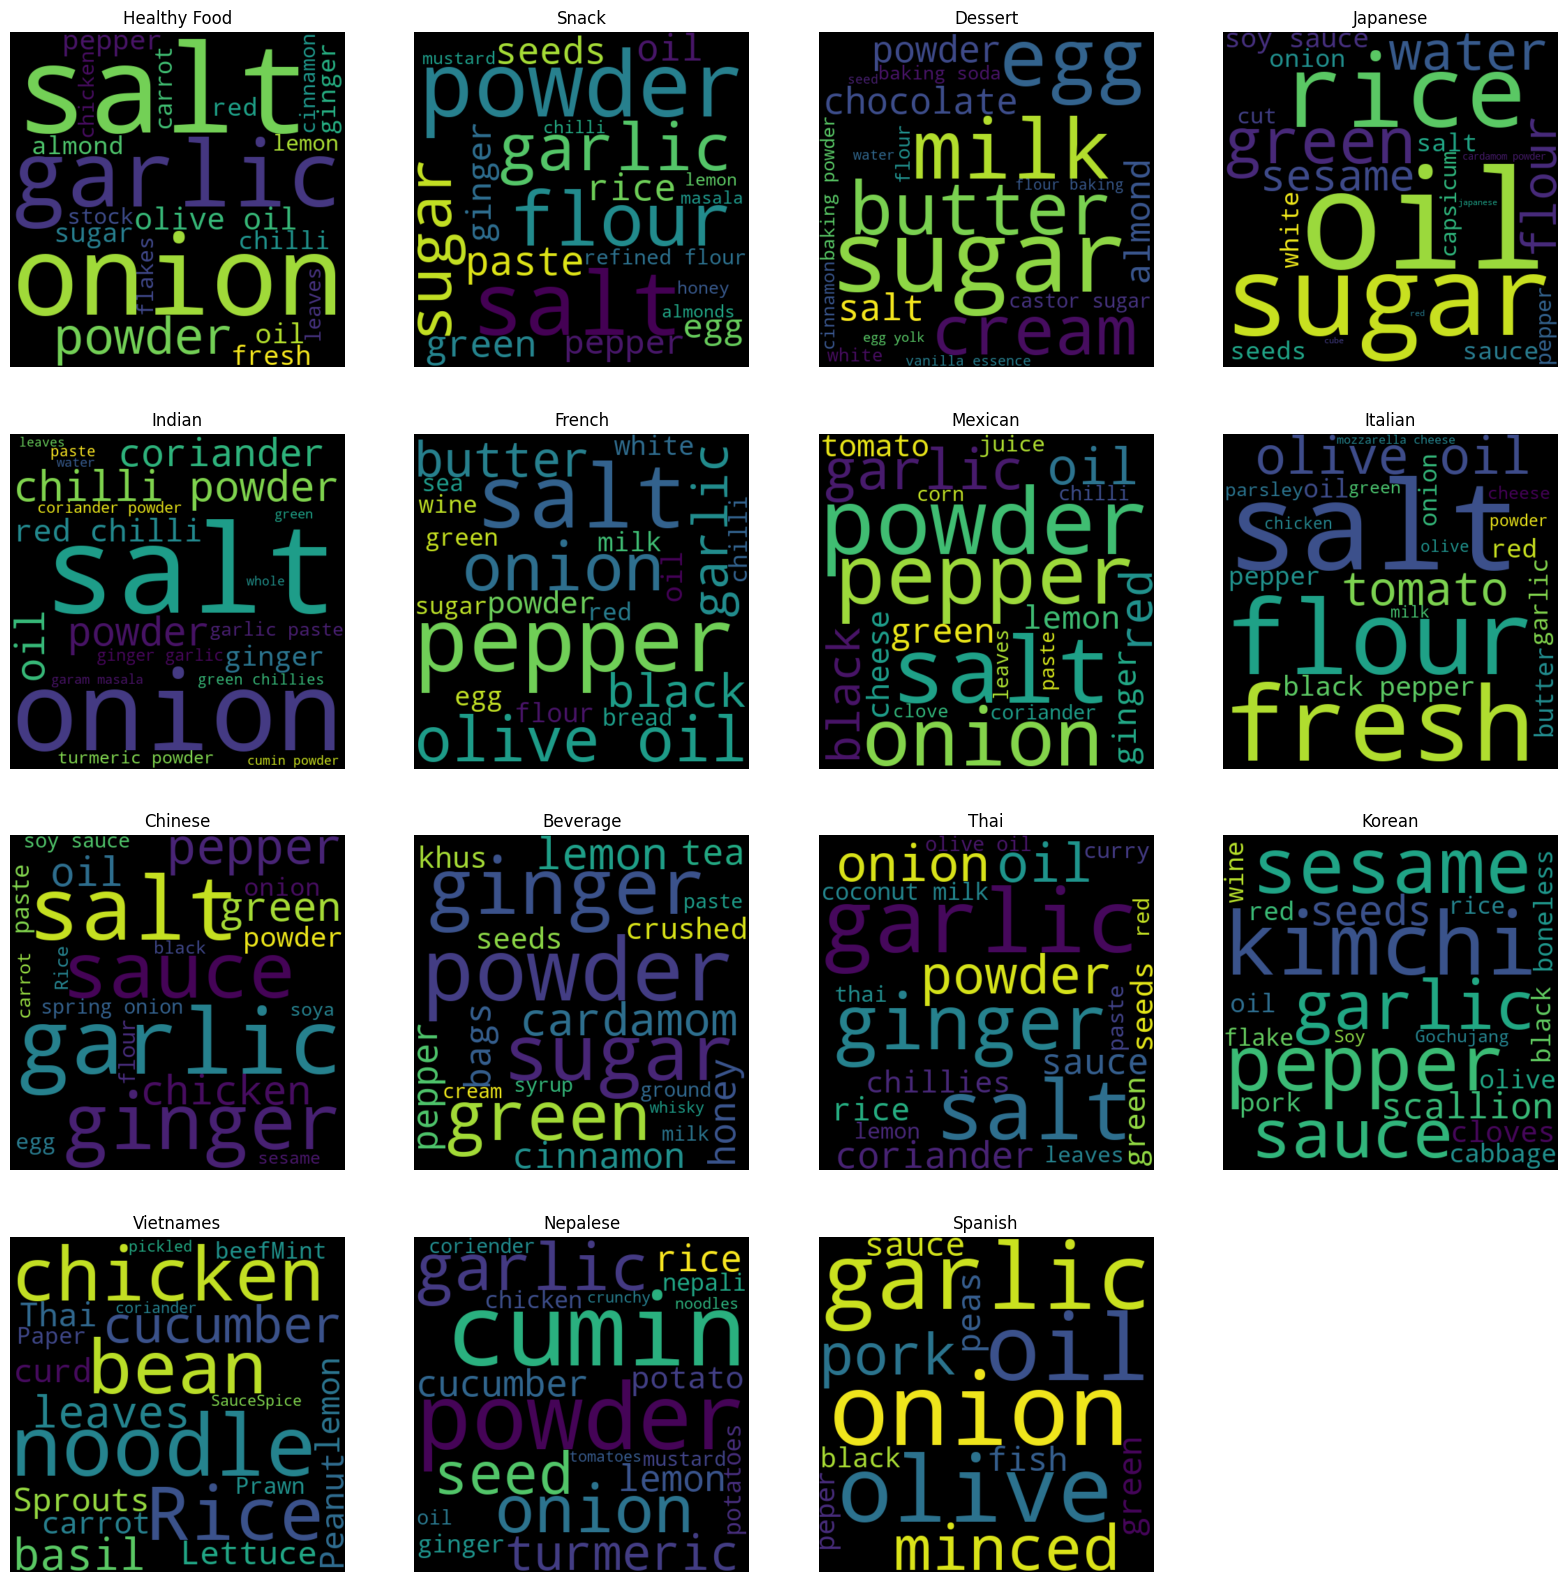

In [21]:
# Wordclouds for each of the cuisine type
plt.figure(figsize=(20,20))
# Iterate through each cuisine type and append all the related text (ingredients) 
for cuisine_num in range(ingredients['C_Type'].nunique()):
    cuisine_text = ''
    for ing_list in ingredients[ingredients['C_Type'] == ingredients['C_Type'].unique()[cuisine_num]]['Describe']:
        cuisine_text = cuisine_text + ing_list
    wordcloud = WordCloud(width=480, height=480, max_words=20).generate(cuisine_text)
    plt.subplot(4, 4, cuisine_num+1)
    plt.title(ingredients['C_Type'].unique()[cuisine_num])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
plt.show()

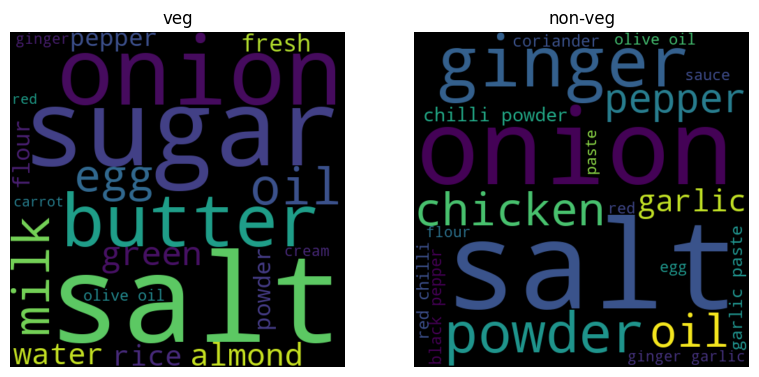

In [22]:
# Wordclouds for each of the Dietary preferences (Veg/ Non-Veg)
plt.figure(figsize=(20,20))
# Iterate through each Dietary type and append all the Dietary preferences (Veg/ Non-Veg) 
for cuisine_num in range(ingredients['Veg_Non'].nunique()):
    cuisine_text = ''
    for ing_list in ingredients[ingredients['Veg_Non'] == ingredients['Veg_Non'].unique()[cuisine_num]]['Describe']:
        cuisine_text = cuisine_text + ing_list
    wordcloud = WordCloud(width=480, height=480, max_words=20).generate(cuisine_text)
    plt.subplot(4, 4, cuisine_num+1)
    plt.title(ingredients['Veg_Non'].unique()[cuisine_num])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
plt.show()

The **Word Clouds for Dietary preferences/ Cuisine Types** visually highlights most frequently recurring ingredients from our set of food descriptions, with major words like "Onion", "Salt", "Oil," "Butter," "Milk," and "Gater" standing out. The visualizations help us in detecting central ingredients that are typically widely shared and can be an asset to our feature engineering of our recommender system. By understanding the central ingredient information, one can recommed most common ingredients that an individual might need based on dietary restrictions/ cuisine types irrespective of the food items. 

The clouds highlight the major ingredients used in each cooking style: kimchi, sesame, and pepper mark Korean cooking; cilantro, lime, and tortilla reflect Mexican cuisine; and turmeric, coconut, and curry symbolize Thai cooking, each standing for their classical methods of cooking them. Some of those ingredients are well known across lots of cuisines and own a pretty distinctive heritage and an endowment in respect to culture and food.

Overall, all the plots helped us in understanding significant differences in the ingredients used for food items prepared with various dietary preferences and cooking styles. 

## Ratings Analysis



**Columns and Data Types:**


**User_ID**: A unique identifier (int64) representing the user providing the rating.

**Food_ID**: A unique identifier (int64) representing the food item being rated.

**Rating**: The numeric score (int64) assigned by the user to the food item (1-10).

In [23]:
ratings

,User_ID,Food_ID,Rating
0,1,88,4
1,1,46,3
2,1,24,5
3,1,25,4
4,2,49,1
...,...,...,...
506,99,65,7
507,99,22,1
508,100,24,10
509,100,233,10


In [24]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   User_ID  511 non-null    int64
 1   Food_ID  511 non-null    int64
 2   Rating   511 non-null    int64
dtypes: int64(3)
memory usage: 12.1 KB


## Scatter plots - User ratings

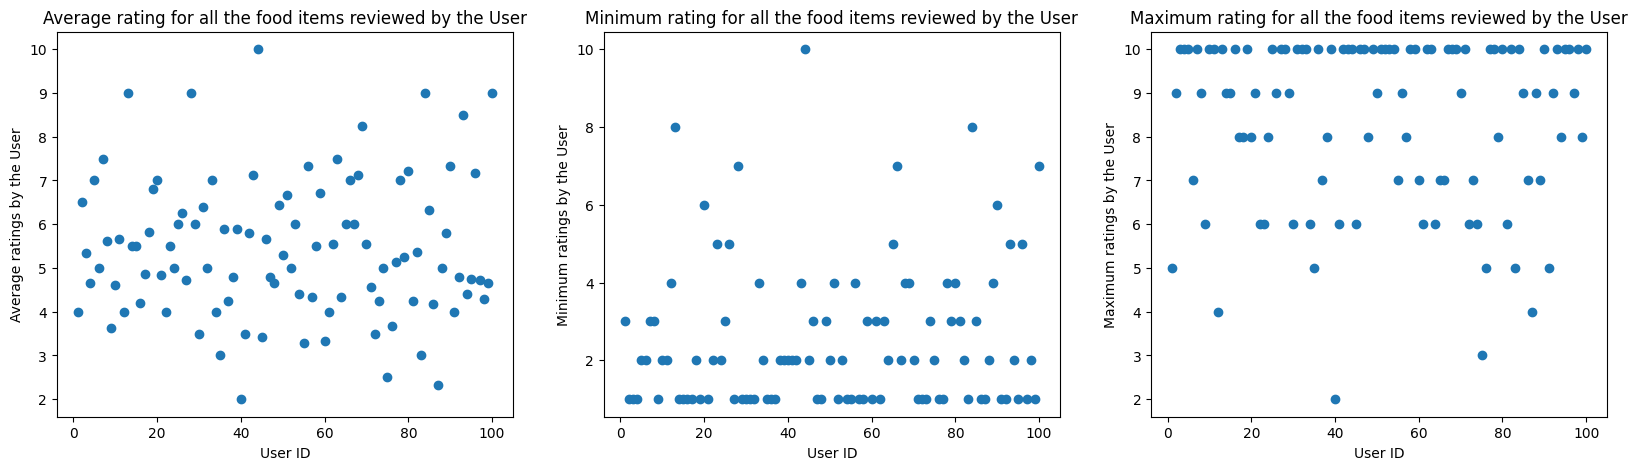

In [25]:
# Average, Minimum and Maximum ratings by every user given for all the food items agregated
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(ratings.groupby('User_ID').mean()['Rating'].keys(), ratings.groupby('User_ID').mean()['Rating'].values)
plt.xlabel('User ID')
plt.ylabel('Average ratings by the User')
plt.title('Average rating for all the food items reviewed by the User')
plt.subplot(1,3,2)
plt.scatter(ratings.groupby('User_ID').min()['Rating'].keys(), ratings.groupby('User_ID').min()['Rating'].values)
plt.xlabel('User ID')
plt.ylabel('Minimum ratings by the User')
plt.title('Minimum rating for all the food items reviewed by the User')
plt.subplot(1,3,3)
plt.scatter(ratings.groupby('User_ID').max()['Rating'].keys(), ratings.groupby('User_ID').max()['Rating'].values)
plt.xlabel('User ID')
plt.ylabel('Maximum ratings by the User')
plt.title('Maximum rating for all the food items reviewed by the User')
plt.show()

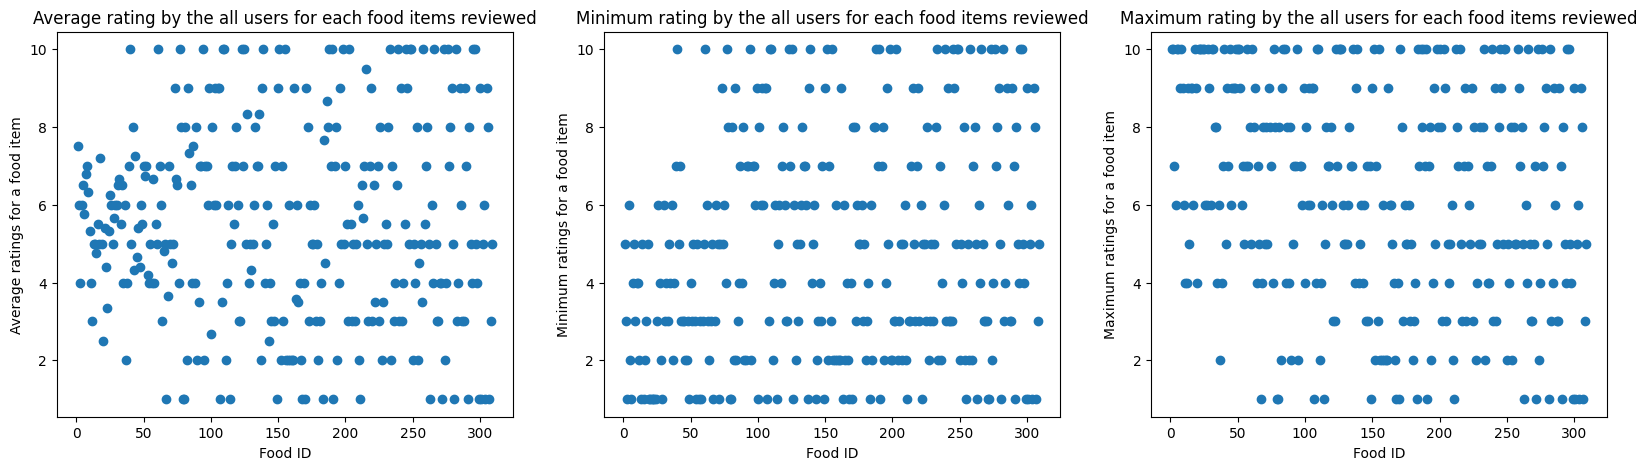

In [26]:
# Average, Minimum and Maximum ratings given for a food item agregated by all the users
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(ratings.groupby('Food_ID').mean()['Rating'].keys(), ratings.groupby('Food_ID').mean()['Rating'].values)
plt.xlabel('Food ID')
plt.ylabel('Average ratings for a food item')
plt.title('Average rating by the all users for each food items reviewed')
plt.subplot(1,3,2)
plt.scatter(ratings.groupby('Food_ID').min()['Rating'].keys(), ratings.groupby('Food_ID').min()['Rating'].values)
plt.xlabel('Food ID')
plt.ylabel('Minimum ratings for a food item')
plt.title('Minimum rating by the all users for each food items reviewed')
plt.subplot(1,3,3)
plt.scatter(ratings.groupby('Food_ID').max()['Rating'].keys(), ratings.groupby('Food_ID').max()['Rating'].values)
plt.xlabel('Food ID')
plt.ylabel('Maximum ratings for a food item')
plt.title('Maximum rating by the all users for each food items reviewed')
plt.show()

User-Based Observations: Some users have relatively high average ratings while others are more critical, and the minimum/maximum rating plots show that certain users only use a subset of the rating scale, whereas others span the entire range from 1 to 10.

Food-Based Observations: Most food items receive a broad range of ratings from different users, as seen by the large spread in minimum and maximum ratings, though some items have higher average ratings than others.

Overall Insight: The wide variation in both user and food specific plots indicates diverse rating behaviors some users are more strict, and some being  in everywhere in their ratings.

This pattern explains the kind of users one can expect in the data. As someone gives highest rating for all the food items and some food item receiving the lowest scores.

Overall, one should ensure the recommender systems are robust to handle these patterns/ outliers.

## Food & Ratings analysis

In [27]:
# Merging ingredient and ratings files
ingredients_ratings = pd.merge(ingredients, ratings, on='Food_ID', how='inner')

We merged ingredients and ratings to identify any patterns in the data by cross-analyzing merged features 

In [28]:
ingredients_ratings

,Food_ID,Name,C_Type,Veg_Non,Describe,Describe Cleaned,ingredients_count,User_ID,Rating
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin...","[white balsamic vinegar, lemon juice, lemon ri...",10,49,5
1,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin...","[white balsamic vinegar, lemon juice, lemon ri...",10,71,10
2,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...","[olive oil, chicken mince, garlic (minced), on...",16,9,3
3,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...","[olive oil, chicken mince, garlic (minced), on...",16,22,5
4,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni...","[olive oil, chicken mince, garlic (minced), on...",16,39,10
...,...,...,...,...,...,...,...,...,...
506,305,sunga pork,Japanese,veg,curry,[curry],1,56,9
507,306,banana chips,Snack,veg,dried slices of bananas (fruits of herbaceous ...,[dried slices of bananas (fruits of herbaceous...,4,80,8
508,307,bhurji- egg,Indian,non-veg,"made using indian spices, onion, tomatoes, gre...","[made using indian spices, onion, tomatoes, gr...",6,71,1
509,308,flattened rice / poha,Indian,veg,dehusked rice which is flattened into flat lig...,[dehusked rice which is flattened into flat li...,6,97,3


In [29]:
# Group by 'Food_ID' and calculate the min, mean and max for 'rating'

grouped = ingredients_ratings.groupby('Food_ID')
mean_ratings = grouped['Rating'].mean()
min_ratings = grouped['Rating'].min()
max_ratings = grouped['Rating'].max()

veg_non = grouped['Veg_Non'].first()

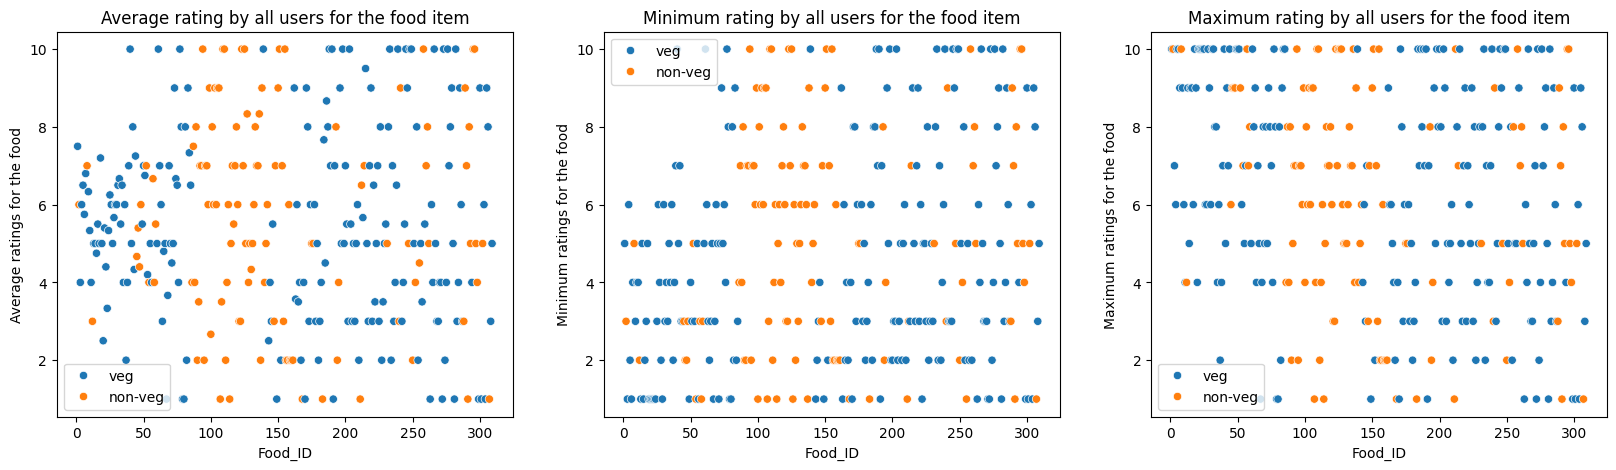

In [30]:
# Average, Minimum and Maximum ratings given for a food item agregated by all the users - Veg/ Non-Veg

plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.scatterplot(x=mean_ratings.index, y=mean_ratings.values, hue=veg_non.values)
plt.xlabel('Food_ID')
plt.ylabel('Average ratings for the food')
plt.title('Average rating by all users for the food item')

plt.subplot(1,3,2)
sns.scatterplot(x=min_ratings.index, y=min_ratings.values, hue=veg_non.values)
plt.xlabel('Food_ID')
plt.ylabel('Minimum ratings for the food')
plt.title('Minimum rating by all users for the food item')

plt.subplot(1,3,3)
sns.scatterplot(x=max_ratings.index, y=max_ratings.values, hue=veg_non.values)
plt.xlabel('Food_ID')
plt.ylabel('Maximum ratings for the food')
plt.title('Maximum rating by all users for the food item')

plt.show()


In [31]:
# Group by 'Food_ID' and calculate the min, mean and max for 'rating'

grouped = ingredients_ratings.groupby('Food_ID')
mean_ratings = grouped['Rating'].mean()
min_ratings = grouped['Rating'].min()
max_ratings = grouped['Rating'].max()

CuisineType = grouped['C_Type'].first()

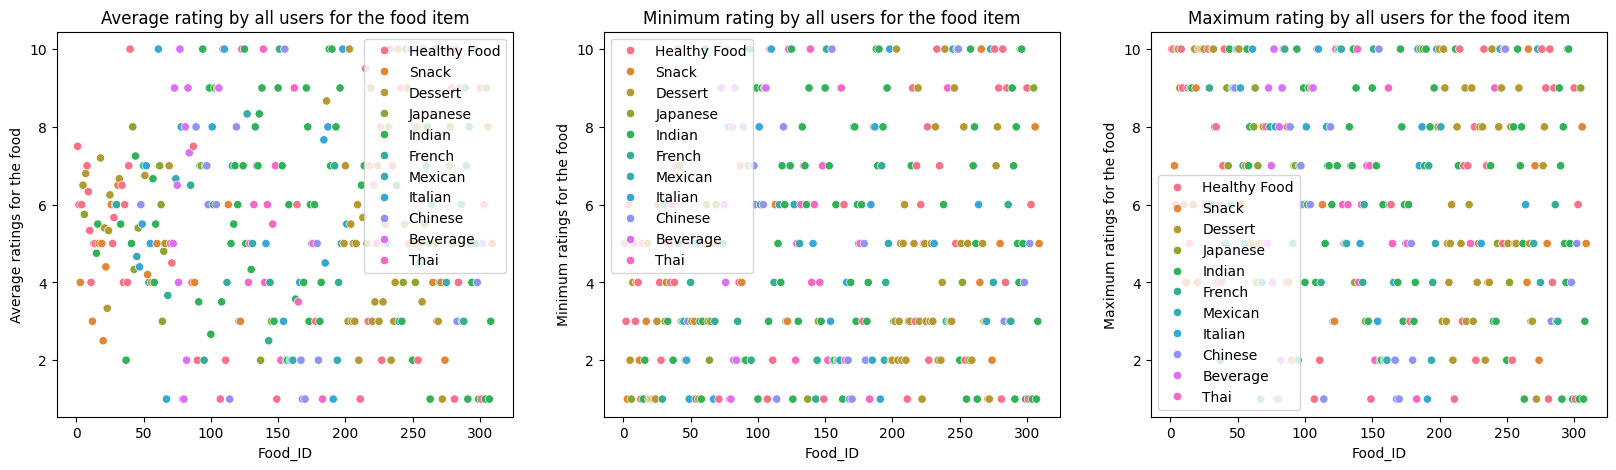

In [32]:
# Average, Minimum and Maximum ratings given for a food item agregated by all the users - Cuisine Type

plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.scatterplot(x=mean_ratings.index, y=mean_ratings.values, hue=CuisineType.values)
plt.xlabel('Food_ID')
plt.ylabel('Average ratings for the food')
plt.title('Average rating by all users for the food item')

plt.subplot(1,3,2)
sns.scatterplot(x=min_ratings.index, y=min_ratings.values, hue=CuisineType.values)
plt.xlabel('Food_ID')
plt.ylabel('Minimum ratings for the food')
plt.title('Minimum rating by all users for the food item')

plt.subplot(1,3,3)
sns.scatterplot(x=max_ratings.index, y=max_ratings.values, hue=CuisineType.values)
plt.xlabel('Food_ID')
plt.ylabel('Maximum ratings for the food')
plt.title('Maximum rating by all users for the food item')

plt.show()


These are additional rating plots which include information about Cuisine Type and Veg/Non-Veg for every data point in the scatter plot with a legend. In the last 2 sets of plots there were no new interpretations, but we included to confirm that we explored the relations between multiple datasets in terms of how the ratings are varying with respect to User, Food item and other dietary preferences.

                                                            **THANK YOU**